In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
url = 'https://raw.githubusercontent.com/Nirmit29/Student-Result-Analysis-DataSet-from-KAGGLE-/refs/heads/main/Expanded_data_with_more_features.csv'
df = pd.read_csv(url)

In [7]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [16]:
df = df.iloc[:,1:]

In [171]:
len(df[(df['MathScore']==100) & (df['Gender']=='female')])

54

In [163]:
df.sample(25)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
21354,female,group C,some high school,standard,none,married,never,no,2.0,private,5 - 10,72,70,77
5486,female,group C,some high school,standard,none,single,sometimes,yes,1.0,private,> 10,72,73,76
27773,female,group C,associate's degree,standard,completed,married,sometimes,yes,0.0,school_bus,5 - 10,100,100,100
13450,male,group C,associate's degree,free/reduced,completed,married,sometimes,yes,2.0,private,5 - 10,84,78,75
16800,female,group B,high school,free/reduced,none,married,sometimes,yes,3.0,private,5 - 10,30,53,51
7016,male,group C,bachelor's degree,standard,completed,single,sometimes,yes,1.0,school_bus,5 - 10,100,94,99
24607,male,group C,some high school,standard,none,NaN,sometimes,yes,4.0,NaN,5 - 10,62,69,59
29816,male,group C,high school,standard,completed,married,regularly,no,2.0,school_bus,5 - 10,79,70,68
20317,female,group C,some high school,standard,none,single,sometimes,no,1.0,private,5 - 10,79,93,82
11752,female,NaN,some college,free/reduced,completed,single,regularly,yes,2.0,private,5 - 10,65,82,90


In [162]:
df['TestPrep'].value_counts()
df['WklyStudyHours'].value_counts()

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [22]:
df.shape

(30641, 14)

<Axes: xlabel='ReadingScore', ylabel='MathScore'>

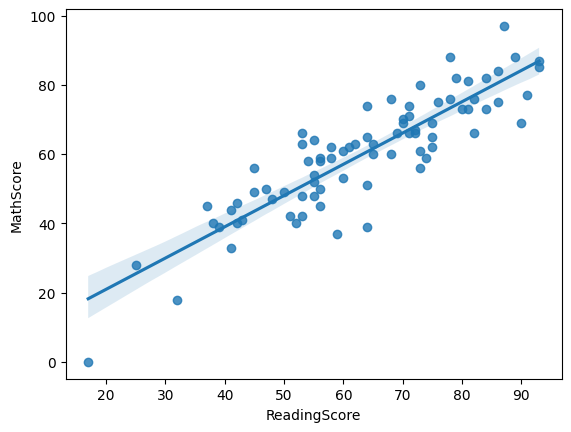

In [28]:
sns.regplot(y='MathScore',x='ReadingScore',data=df.iloc[:80,:])

<Axes: xlabel='WritingScore', ylabel='MathScore'>

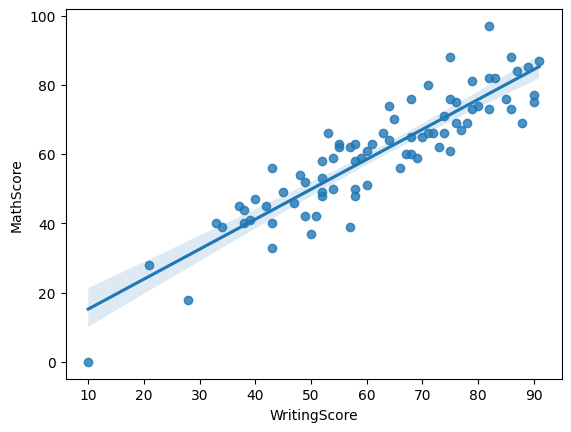

In [29]:
sns.regplot(y='MathScore',x='WritingScore',data=df.iloc[:80,:])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [502]:
X=df[['ReadingScore','WritingScore']].head(200)
y=df['MathScore'].head(200)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [503]:
lr = LinearRegression()

In [504]:
lr.fit(X_train,y_train)

LinearRegression()

In [507]:
1-lr.score(X_test,y_test)

0.1712452155434132

In [515]:
y_pred = lr.predict(X_test)
mean_squared_error(y_test,y_pred)


43.688222093781874

In [516]:
y_test

96     58
5      73
116    86
35     76
183    56
160    63
54     61
134    57
90     64
191    71
139    62
142    58
177    73
26     66
89     61
140    57
171    61
23     66
132    60
37     77
151    52
28     70
85     45
93     87
174    47
75     50
18     46
105    98
121    87
130    73
33     97
46     54
168    46
169    50
11     40
166    99
81     57
111    76
67     47
147    70
86     81
182    57
69     28
125    76
42     48
77     40
62     62
154    53
59     63
148    82
175    74
24     74
143    69
64     64
196    77
40     59
112    88
52     84
145    58
136    21
Name: MathScore, dtype: int64

In [517]:
y_pred

array([66.53316477, 75.90537761, 82.31839581, 78.06508971, 53.07231266,
       65.57696595, 58.31487664, 46.07406735, 61.3977285 , 69.15444676,
       65.09886654, 59.13088869, 73.88585226, 52.48708555, 63.41725385,
       63.06281167, 61.04328633, 67.47283406, 61.41425803, 83.64556633,
       50.57468791, 64.24979543, 49.52789092, 84.47810792, 47.95340592,
       50.83853191, 45.71962517, 91.26209782, 77.33967583, 63.45031291,
       78.40300236, 50.80547285, 62.60124179, 48.55516257, 47.35164928,
       91.61654   , 64.85155207, 81.37872652, 44.49958235, 62.24679962,
       84.14019527, 62.23027009, 27.26352356, 73.05331068, 52.71787049,
       37.60846474, 56.17169406, 50.82200238, 58.06756217, 71.38822751,
       79.48285841, 71.77572875, 81.62604099, 58.4550634 , 72.46808357,
       67.57996177, 82.22779763, 80.43905723, 57.00423564, 37.60846474])

In [151]:
df.isnull().sum(),[df.shape]

(Gender                    0
 EthnicGroup            1840
 ParentEduc             1845
 LunchType                 0
 TestPrep               1830
 ParentMaritalStatus    1190
 PracticeSport           631
 IsFirstChild            904
 NrSiblings             1572
 TransportMeans         3134
 WklyStudyHours          955
 MathScore                 0
 ReadingScore              0
 WritingScore              0
 dtype: int64,
 [(30641, 14)])

In [154]:
((df.isnull().sum().sum())/(30641*9))*100

5.040813144334569

In [196]:
new_df=df.dropna(axis=0)
new_df = new_df[['TestPrep','PracticeSport','ReadingScore','WritingScore','MathScore']]
new_df.info()
encoded= pd.get_dummies(new_df[['TestPrep','PracticeSport']]).astype('int64')

<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TestPrep       19243 non-null  object
 1   PracticeSport  19243 non-null  object
 2   ReadingScore   19243 non-null  int64 
 3   WritingScore   19243 non-null  int64 
 4   MathScore      19243 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 902.0+ KB


In [197]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   TestPrep_completed       19243 non-null  int64
 1   TestPrep_none            19243 non-null  int64
 2   PracticeSport_never      19243 non-null  int64
 3   PracticeSport_regularly  19243 non-null  int64
 4   PracticeSport_sometimes  19243 non-null  int64
dtypes: int64(5)
memory usage: 902.0 KB


In [198]:
newdf = encoded


In [199]:
newdf[['ReadingScore','WritingScore','MathScore']]=new_df[['ReadingScore','WritingScore','MathScore']]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   TestPrep_completed       19243 non-null  int64
 1   TestPrep_none            19243 non-null  int64
 2   PracticeSport_never      19243 non-null  int64
 3   PracticeSport_regularly  19243 non-null  int64
 4   PracticeSport_sometimes  19243 non-null  int64
 5   ReadingScore             19243 non-null  int64
 6   WritingScore             19243 non-null  int64
 7   MathScore                19243 non-null  int64
dtypes: int64(8)
memory usage: 1.3 MB


In [204]:
newdf.columns

Index(['TestPrep_completed', 'TestPrep_none', 'PracticeSport_never',
       'PracticeSport_regularly', 'PracticeSport_sometimes', 'ReadingScore',
       'WritingScore', 'MathScore'],
      dtype='object')

In [394]:
X_2=newdf[['TestPrep_completed', 'TestPrep_none', 'PracticeSport_never','PracticeSport_regularly', 'PracticeSport_sometimes', 'ReadingScore','WritingScore']].head(500)
y_2=newdf['MathScore'].head(500)

X_train_2, X_test_2,y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.3,random_state=345)

In [395]:
lgr = LogisticRegression()
lgr.fit(X_train_2,y_train_2)

C:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [396]:
lgr.score(X_test_2,y_test_2)

0.013333333333333334

In [498]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=79)

In [499]:
dt.fit(X_train_2,y_train_2)

DecisionTreeRegressor(min_samples_split=79)

In [500]:
dt.score(X_test_2,y_test_2)

0.6614927135437789

In [501]:
from sklearn.metrics import r2_score,mean_squared_error